# XGBoost
by Ben Royles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Binary-XGBoost" data-toc-modified-id="Binary-XGBoost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Binary XGBoost</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

df = pd.read_csv('complete.csv')
df.shape

(61845, 216)

In [2]:
df.columns.tolist()

['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'Match Week',
 'FullTimeResult',
 'DistanceTraveled in Km',
 'Weekday',
 'Month',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'A

Removing the non-numeric and descriptive columns from the dataframe. I have also elected to remove the stadium and distance data. This is because the data was only available for a small proportion of the leagues in the data set. Keeping it in would reduce the number of observations to around 21000.

In [3]:
df.drop(['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'DistanceTraveled in Km',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away'], axis=1, inplace=True)

In [4]:
df.dropna(inplace=True)
df.shape

(44565, 195)

# Data Prep

In [8]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult'].map({
                                'A': 0,
                                'D': 1,
                                'H': 2
                                    })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [9]:
# Calculate the value counts of each class in y_train
value_counts = y_train.value_counts()

# Calculate the total number of samples in y_train
total_samples = len(y_train)

# Calculate the ratio (percentage) of each class in y_train
class_ratios = value_counts / total_samples

# Display the class ratios
print(class_ratios)
print(X_train.shape)
print(X_test.shape)

2    0.435929
0    0.301901
1    0.262170
Name: FullTimeResult, dtype: float64
(37880, 194)
(6685, 194)


# XGBoost 

In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and Train the Classifier
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [50, 100]
}

grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best classifier from the grid search
classifier = grid_search.best_estimator_

y_test_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_test_pred))


Accuracy: 0.5048616305160808
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1968
           1       0.41      0.03      0.06      1724
           2       0.52      0.82      0.64      2993

    accuracy                           0.50      6685
   macro avg       0.47      0.43      0.38      6685
weighted avg       0.48      0.50      0.43      6685



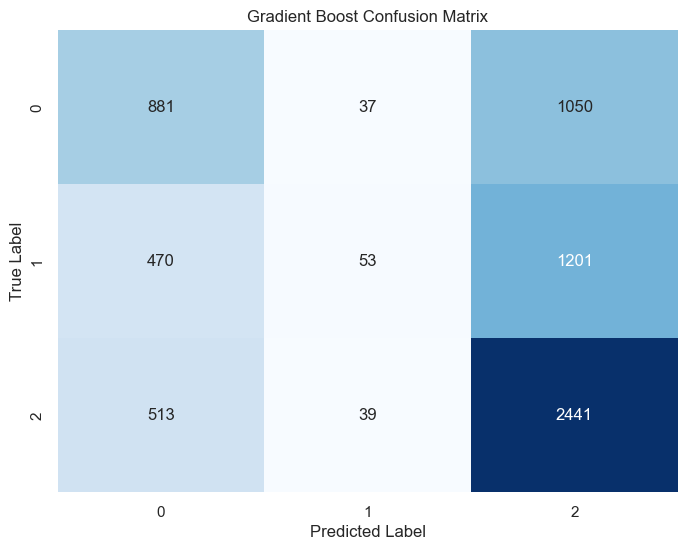

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boost Confusion Matrix")
plt.show()

# Binary XGBoost


I will now train the model to only predict home wins and away wins. The models I have produced all perform poorly when predicting a draw. This is because it is effectively the middle value of the three and a match can share very similar features and end in a draw instead of either a home win or away win. On top of that, draws only make up 26% of the data. As my previous model only scored an accuracy of 50% when trying to predict all three classes, there is a chance that I can improve the overall accuracy by only predicting the 'extremes'.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Drop all entries where FullTimeResult = 'D' from the training set
train_data = train_data[train_data['FullTimeResult'] != 'D']

# Split back into X_train and y_train
X_train = train_data.drop(columns='FullTimeResult')
y_train = train_data['FullTimeResult']

# Calculate the value counts of each class in y_train
value_counts = y_train.value_counts()

# Calculate the total number of samples in y_train
total_samples = len(y_train)

# Calculate the ratio (percentage) of each class in y_train
class_ratios = value_counts / total_samples

# Display the class ratios
print(class_ratios)

H    0.590826
A    0.409174
Name: FullTimeResult, dtype: float64


In [13]:
y_train = y_train.map({'A': 0, 'H': 1})

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and Train the Classifier
classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [50, 100]
}

grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best classifier from the grid search
classifier = grid_search.best_estimator_

# Evaluate the Model on Validation Set
y_pred = classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_val, y_pred))

Accuracy: 0.672093023255814
              precision    recall  f1-score   support

           0       0.65      0.44      0.53      2313
           1       0.68      0.84      0.75      3277

    accuracy                           0.67      5590
   macro avg       0.67      0.64      0.64      5590
weighted avg       0.67      0.67      0.66      5590



Unsurprising, the model is much more accurate when only predicting  home wins and away wins, however, the validation set also only contained wins. In order to see if this has produced a more robust model, it needs to be scored against the test set that contains draws as well.

In [14]:
y_test = y_test.map({'A': 0, 'H': 1, 'D':2})
y_test_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_test_pred))

Accuracy: 0.5036649214659686
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1968
           1       0.52      0.83      0.64      2993
           2       0.00      0.00      0.00      1724

    accuracy                           0.50      6685
   macro avg       0.33      0.43      0.36      6685
weighted avg       0.37      0.50      0.42      6685



C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Only predicting for A or H has resulted in a very small decrease in overall accuracy. It did cause a minor improvement in the precision for predicting 0 and 1, A and H respectively, but it is unlikely to be make the model "better" than one that can predict all three classes.